In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE  
import sklearn   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [2]:
#Loading Dataset
Data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
Data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Getting First Five Rows
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#To get information about dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
Data = Data[Data["TotalCharges"] != " "]
Data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
for i in Data.columns:
    if Data[i].dtype=="object" and i!="customerID":
        print(Data[i].value_counts())
        print()
    elif i=="SeniorCitizen":
        print(Data[i].value_counts())
        print()

Male      3549
Female    3483
Name: gender, dtype: int64

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

No                     2809
Yes     

In [7]:
#To convert string datatype to float
Data['TotalCharges'] = pd.to_numeric(Data['TotalCharges'], errors='coerce')

In [8]:
Label1 = {'No': 2, 'Yes': 1}
Data["Partner"]=Data['Partner'].map(Label1)

In [9]:
Label2 = {'Male': 2, 'Female': 1}
Data["gender"]=Data['gender'].map(Label2)

In [10]:
Label3 = {'No': 2, 'Yes': 1}
Data["Dependents"]=Data['Dependents'].map(Label3)

In [11]:
Label4 = {'Yes': 2, 'No': 1}
Data["PhoneService"]=Data['PhoneService'].map(Label4)

In [12]:
Label5 = {'No': 3, 'Yes': 2, 'No phone service': 1}
Data["MultipleLines"]=Data['MultipleLines'].map(Label5)

In [13]:
Label6 = {'Fiber optic': 3, 'DSL': 2, 'No': 1}
Data["InternetService"]=Data['InternetService'].map(Label6)

In [14]:
Label7 = {'No': 3, 'Yes': 2, 'No internet service': 1}
Data["OnlineSecurity"]=Data['OnlineSecurity'].map(Label7)

In [15]:
Label8 = {'No': 3, 'Yes': 2, 'No internet service': 1}
Data["OnlineBackup"]=Data['OnlineBackup'].map(Label8)

In [16]:
Label10 = {'No': 3, 'Yes': 2, 'No internet service': 1}
Data["DeviceProtection"]=Data['DeviceProtection'].map(Label10)

In [17]:
Label11 = {'No': 3, 'Yes': 2, 'No internet service': 1}
Data["TechSupport"]=Data['TechSupport'].map(Label11)

In [18]:
Label12 = {'No': 3, 'Yes': 2, 'No internet service': 1}
Data["StreamingTV"]=Data['StreamingTV'].map(Label12)

In [19]:
Label13 = {'No': 3, 'Yes': 2, 'No internet service': 1}
Data["StreamingMovies"]=Data['StreamingMovies'].map(Label13)

In [20]:
Label14 = {'Month-to-month': 3, 'Two year': 2, 'One year': 1}
Data["Contract"]=Data['Contract'].map(Label14)

In [21]:
Label15 = {'Yes': 2, 'No': 1}
Data["PaperlessBilling"]=Data['PaperlessBilling'].map(Label15)

In [22]:
Label16 = {'Electronic check': 4,
 'Mailed check': 3,
 'Bank transfer (automatic)': 2,
 'Credit card (automatic)': 1}
Data["PaymentMethod"]=Data['PaymentMethod'].map(Label16)

In [23]:
Label17 = {'No': 0, 'Yes': 1}
Data["Churn"]=Data['Churn'].map(Label17)

In [24]:
Data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,2,1,1,1,2,3,...,3,3,3,3,3,2,4,29.85,29.85,0
1,5575-GNVDE,2,0,2,2,34,2,3,2,2,...,2,3,3,3,1,1,3,56.95,1889.50,0
2,3668-QPYBK,2,0,2,2,2,2,3,2,2,...,3,3,3,3,3,2,3,53.85,108.15,1
3,7795-CFOCW,2,0,2,2,45,1,1,2,2,...,2,2,3,3,1,1,2,42.30,1840.75,0
4,9237-HQITU,1,0,2,2,2,2,3,3,3,...,3,3,3,3,3,2,4,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2,0,1,1,24,2,2,2,2,...,2,2,2,2,1,2,3,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,2,2,3,3,...,2,3,2,2,1,2,1,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,1,1,2,2,...,3,3,3,3,3,2,4,29.60,346.45,0
7041,8361-LTMKD,2,1,1,2,4,2,2,3,3,...,3,3,3,3,3,2,3,74.40,306.60,1


In [25]:
#To check shape of dataset
Data.shape

(7032, 21)

In [26]:
#To check whether it contain any null value or not
Data.isnull().sum().sum()

0

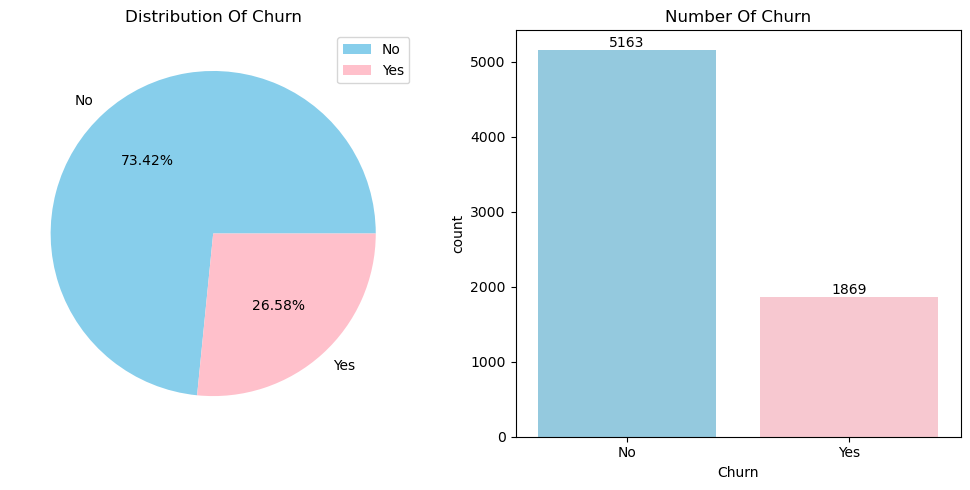

In [27]:
#The dataset is highly imbalanced
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the bar chart on the right side
axs[1].set_title("Number Of Churn")
axs[1].set_xlabel("Churn")
axs[1].set_ylabel("Frequency")
a = sns.countplot(data=Data, x='Churn', ax=axs[1], palette=["skyblue", "pink"])
for x in a.containers:
    a.bar_label(x)
axs[1].set_xticklabels(["No", "Yes"])

# Plot the pie chart on the left side
axs[0].set_title("Distribution Of Churn")
axs[0].pie(Data["Churn"].value_counts(), labels=["No", "Yes"], autopct="%0.2f%%", colors=["skyblue", "pink"])
axs[0].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


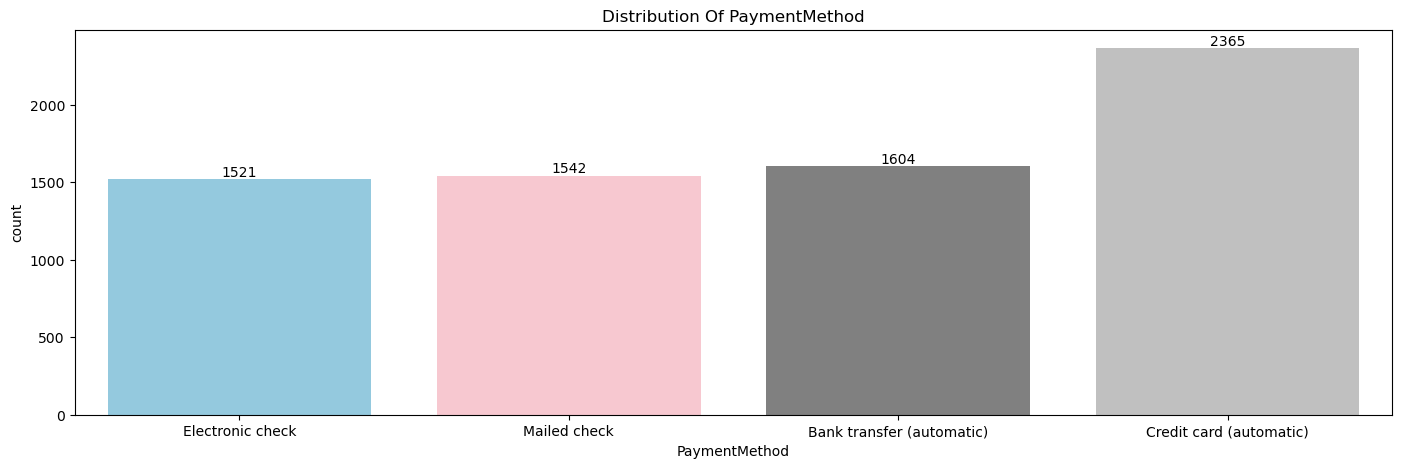

In [28]:
plt.figure(figsize = (17,5))
plt.title("Distribution Of PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Frequency")
a = sns.countplot(data=Data, x='PaymentMethod', palette=["skyblue", "pink", "grey", "silver"])
for x in a.containers:
    a.bar_label(x)
a.set_xticklabels(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])

plt.show()


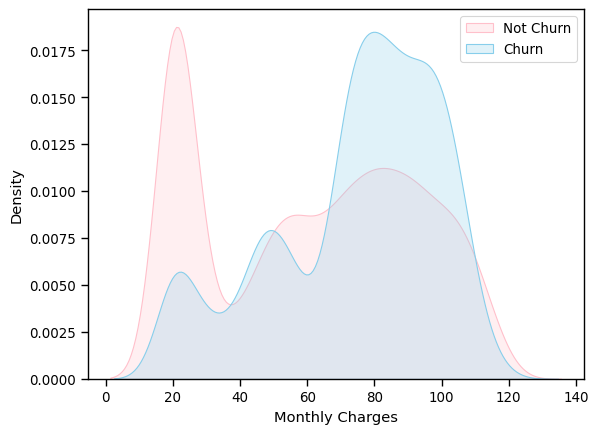

In [29]:
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Churn"] == 0)],
                 color="Pink", shade=True)
ax = sns.kdeplot(Data.MonthlyCharges[(Data["Churn"] == 1)],
                 ax=ax, color="SkyBlue", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')

plt.show()

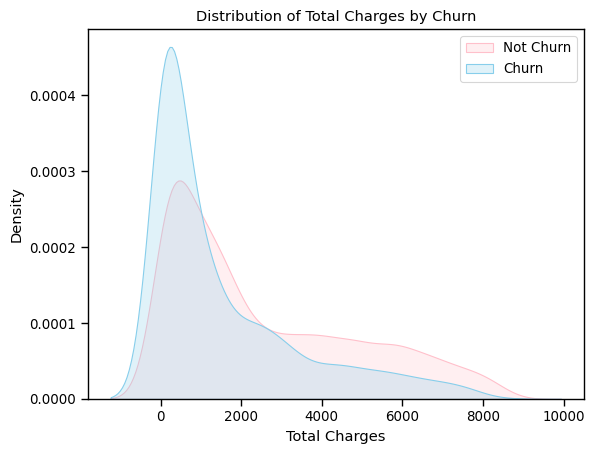

In [30]:
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(Data.TotalCharges[(Data["Churn"] == 0)],
                 color="Pink", shade=True)
ax = sns.kdeplot(Data.TotalCharges[(Data["Churn"] == 1)],
                 ax=ax, color="SkyBlue", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

plt.show()

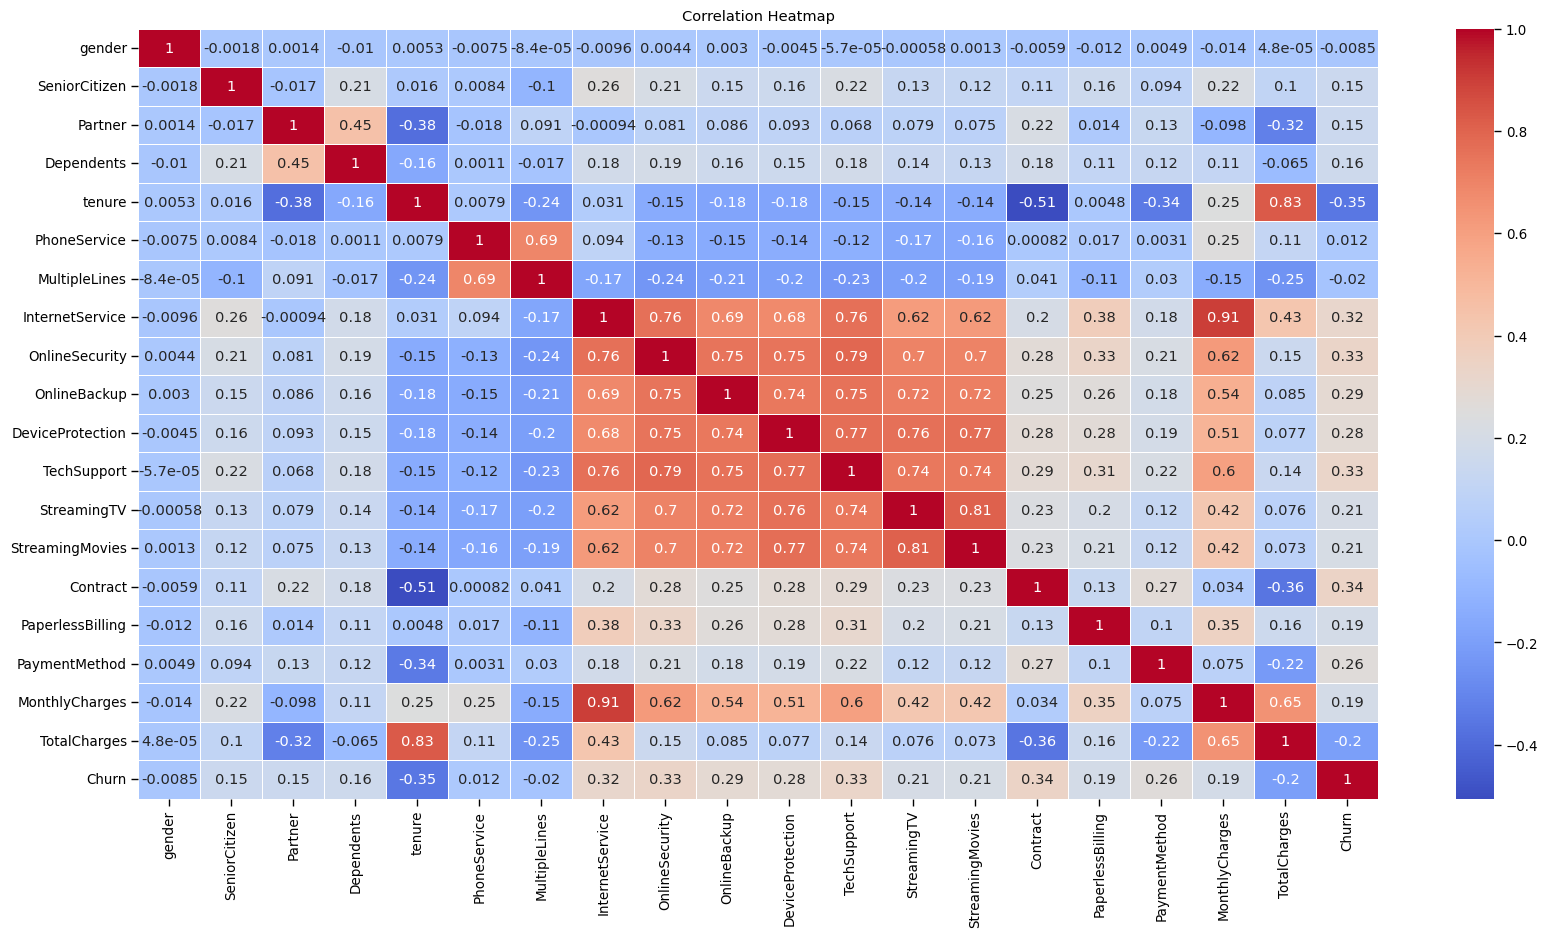

In [31]:
correlation_matrix = Data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
X=Data.drop(columns=["Churn","customerID"])
y = Data['Churn']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,-1.035617,0.652305,-1.280248,-3.056334,-2.111355,-0.287852,0.902520,-0.286376,0.997019,0.908107,1.070517,1.078089,0.820537,0.828939,1.144520,-1.161694,-0.994194
1,0.990658,-0.440327,0.965608,0.652305,0.064303,0.327189,0.938260,-0.287852,-0.352974,0.998752,-0.287524,0.908107,1.070517,1.078089,-1.672449,-1.206361,0.274531,-0.260878,-0.173740
2,0.990658,-0.440327,0.965608,0.652305,-1.239504,0.327189,0.938260,-0.287852,-0.352974,-0.286376,0.997019,0.908107,1.070517,1.078089,0.820537,0.828939,0.274531,-0.363923,-0.959649
3,0.990658,-0.440327,0.965608,0.652305,0.512486,-3.056334,-2.111355,-0.287852,-0.352974,0.998752,-0.287524,-0.348942,1.070517,1.078089,-1.672449,-1.206361,-0.595457,-0.747850,-0.195248
4,-1.009430,-0.440327,0.965608,0.652305,-1.239504,0.327189,0.938260,0.996525,0.902520,0.998752,0.997019,0.908107,1.070517,1.078089,0.820537,0.828939,1.144520,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.990658,-0.440327,-1.035617,-1.533025,-0.343137,0.327189,-0.586548,-0.287852,-0.352974,0.998752,-0.287524,-0.348942,-0.240274,-0.235569,-1.672449,0.828939,0.274531,0.664868,-0.129180
7028,-1.009430,-0.440327,-1.035617,-1.533025,1.612573,0.327189,-0.586548,0.996525,0.902520,-0.286376,-0.287524,0.908107,-0.240274,-0.235569,-1.672449,0.828939,-1.465445,1.276493,2.241056
7029,-1.009430,-0.440327,-1.035617,-1.533025,-0.872808,-3.056334,-2.111355,-0.287852,-0.352974,0.998752,0.997019,0.908107,1.070517,1.078089,0.820537,0.828939,1.144520,-1.170004,-0.854514
7030,0.990658,2.271039,-1.035617,0.652305,-1.158016,0.327189,-0.586548,0.996525,0.902520,0.998752,0.997019,0.908107,1.070517,1.078089,0.820537,0.828939,0.274531,0.319168,-0.872095


In [34]:
# Assuming X_scaled and Y are already prepared and scaled
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)



In [35]:
X1_res_train, X1_res_test, y1_res_train, y1_res_test = train_test_split(X_res, y_res, test_size = 0.20,  random_state = 42)

In [36]:
model = LogisticRegression()
model.fit(X1_res_train, y1_res_train)

LogisticRegression()

In [37]:
y_pred= model.predict(X1_res_test)

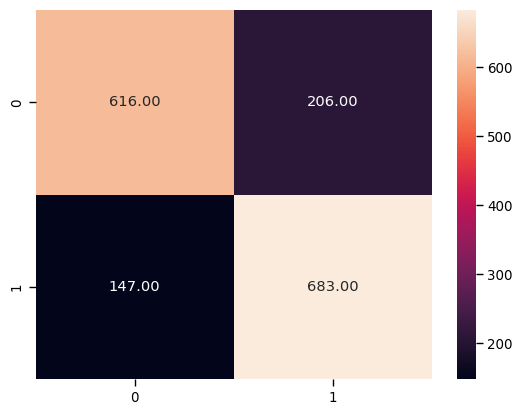

In [38]:
sns.heatmap(confusion_matrix(y1_res_test, y_pred), annot = True , fmt = ".2f" )
plt.show()

In [39]:
print(classification_report(y1_res_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       822
           1       0.77      0.82      0.79       830

    accuracy                           0.79      1652
   macro avg       0.79      0.79      0.79      1652
weighted avg       0.79      0.79      0.79      1652

